<a href="https://colab.research.google.com/github/kothaneha8/DS-ML-AI-Practice/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In [ ]:
# Workflow of Machine Learning Model
'''
1) Setting up the data
2) Creating the Model
3) Training the Model
4) Testing the Model
5) Prediction

'''

'\n1) Setting up the data\n2) Creating the Model\n3) Training the Model\n4) Testing the Model\n5) Prediction\n\n'

In [ ]:
# Import Important dependencies
import numpy as np
import pandas as pd

In [ ]:
# Importing Logistic Regression Model(Binary Output)
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
# Import accuracy function
from sklearn.metrics import accuracy_score

In [ ]:
# To convert all the string format into numeric
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Importing the dataset
df=pd.read_csv('mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6562,spam,Click on this link to win lottery
6563,spam,Click on this link to win lottery
6564,spam,Click on this link to win lottery
6565,spam,Click on this link to win lottery


In [ ]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  6567 non-null   object
 1   Message   6567 non-null   object
dtypes: object(2)
memory usage: 102.7+ KB


In [ ]:
# Checking null values
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
# Basic Analysis
# Check the ham/spam emails count
df['Category'].value_counts().reset_index()

,Category,count
0,ham,4825
1,spam,1742


In [ ]:
# Checking unique values from category column
pd.unique(df['Category'])

array(['ham', 'spam'], dtype=object)

In [ ]:
# Label Encoding
# Labelling spam email as 0 and ham email as 1
df.loc[df['Category']=='ham','category']=1
df.loc[df['Category']=='spam','category']=0

In [ ]:
# Seperating the Mail data into Input data and Label(Output data)
X=df['Message']
Y=df['category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
6562                    Click on this link to win lottery
6563                    Click on this link to win lottery
6564                    Click on this link to win lottery
6565                    Click on this link to win lottery
6566                    Click on this link to win lottery
Name: Message, Length: 6567, dtype: object


In [ ]:
print(Y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6562    0.0
6563    0.0
6564    0.0
6565    0.0
6566    0.0
Name: category, Length: 6567, dtype: float64


In [ ]:
# Splitting the data into Training data and Testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(6567,)
(5253,)
(1314,)


In [ ]:
# Transforming the test into numeric machine understanding data
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [ ]:
X_train_num=feature_extraction.fit_transform(X_train)
X_test_num=feature_extraction.transform(X_test)

In [ ]:
# Convert Y_train and Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [ ]:
# Training the model
model=LogisticRegression()

In [ ]:
# Training the Logistic Regression model with training data
model.fit(X_train_num,Y_train)

LogisticRegression()

In [ ]:
# Evaluating the Training Model
X_train_prediction=model.predict(X_train_num)
# Finding the accuracy score of training data
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of Training data is",training_data_accuracy)

Accuracy score of Training data is 0.9733485627260613


In [ ]:
# Evaluating the Test Model
X_test_prediction=model.predict(X_test_num)
# Finding the accuracy score of testing data
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of Testing data is",testing_data_accuracy)

Accuracy score of Testing data is 0.9627092846270928


In [ ]:
# Build a predictive system
input_data=['Free free free click on this link to avail free cash prize']
input_data_num=feature_extraction.transform(input_data)

In [ ]:
# Making prediction
prediction=model.predict(input_data_num)
if prediction==1:
  print('Ham Email')
else:
  print('Spam Email')

Spam Email


# Machine Learning Project 2

In [ ]:
# Importing Important dependencies
import numpy as np
import pandas as pd

In [ ]:
# Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importing accuracy score function
from sklearn.metrics import accuracy_score

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
# Importing the dataset
df=pd.read_csv('Breast_Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Check number of Bengin and Malignant Tumer
df['diagnosis'].value_counts().reset_index()

,diagnosis,count
0,B,357
1,M,212


In [ ]:
# Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Checking the null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Droping column Unnamed: 32
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Convert B-1 and M-0 in the diagnosis column
df.loc[df['diagnosis']=='B','diagnosis']=1
df.loc[df['diagnosis']=='M','diagnosis']=0
df['diagnosis'] = df['diagnosis'].astype(int)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Split the data into Input Feature-X
# Target Column-Y
X=df.drop(['diagnosis'],axis=1)
Y=df['diagnosis'].astype(int)

In [ ]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: object


In [ ]:
# Splitting the data into Training data and Testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(455, 30)
(114, 30)


In [ ]:
# Training the model
model=LogisticRegression()

In [ ]:
# Training the Logistic Regression model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluating the Training Model
X_train_prediction=model.predict(X_train)
# Finding the accuracy score of training data
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of Training data is",training_data_accuracy)

Accuracy score of Training data is 0.9384615384615385


In [ ]:
# Evaluating the Testing Model
X_test_prediction=model.predict(X_test)
# Finding the accuracy score of testing data
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of Testing data is",testing_data_accuracy)

Accuracy score of Testing data is 0.9473684210526315


In [ ]:
# Building a predictive system
input_data = (13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the numpy array as one data point
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

In [ ]:
# Prediction for one data point
prediction=model.predict(input_data_reshape)
# The prediction is a NumPy array, so access the first element and convert to int for comparison
if int(prediction[0]) == 0:
  print('Breast Cancer is Malignant')
else:
  print('Breast Cancer is Benign')

Breast Cancer is Benign


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Machine Learning Project 3

In [ ]:
# Imprting important dependencies
import numpy as np
import pandas as pd

In [ ]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# Importing accuracy score function
from sklearn import metrics

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
# Importing the dataset
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Cheacking null values
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# Basic Analysis
pd.unique(df['Fuel_Type'])

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
pd.unique(df['Seller_Type'])

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
pd.unique(df['Transmission'])

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
# Encoding the Fuel Type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
# Encoding the Seller Type column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
# Encoding the Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# Splitting the data into Input Feature(X) and Label(Y)
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
# Splitting the data into Training data and Testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(301, 7)
(240, 7)
(61, 7)


In [ ]:
# Model Training
model=LinearRegression()

In [ ]:
# Training the ML model using training data
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Prediction for Training data
training_data_accuracy=model.predict(X_train)
# To find accuracy score do not use accuracy_score function
training_data_accuracy=metrics.r2_score(Y_train,training_data_accuracy)
print("Accuracy score of training data is",training_data_accuracy)

Accuracy score of training data is 0.8789418946675761


In [ ]:
# Prediction for Testing data
testing_data_accuracy=model.predict(X_test)
# To find accuracy score do not use accuracy_score function
testing_data_accuracy=metrics.r2_score(Y_test,testing_data_accuracy)
print("Accuracy score of testing data is",testing_data_accuracy)

Accuracy score of testing data is 0.8522891800965502


In [ ]:
# Building a predictive system
input_data=(2017,25.39,15000,1,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
# Reshape the numpy array as one data point
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
# Prediction for one data point
prediction=model.predict(input_data_reshape)
print("Selling Price is",prediction)

Selling Price is [17.01034989]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Machine Learning Project 4

In [ ]:
# Importing Important Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Model Selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importing the dataset
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Printing the first 10 row
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# Find unique values in quality column
pd.unique(df['quality'])

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Checking the no.of rows based on quality
df['quality'].value_counts().reset_index()

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


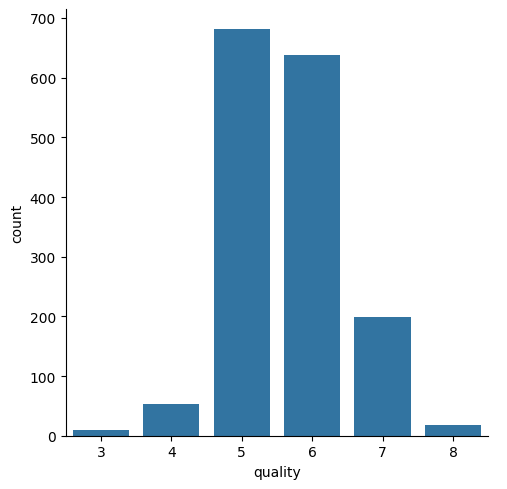

In [ ]:
# visualize the above question
sns.catplot(x='quality',data=df,kind='count')
plt.show()

In [ ]:
# Input Feature-X (All columns except)
X=df.drop('quality',axis=1)
Y=df['quality']

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [ ]:
# Splitting the data into Training data and Testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
print(Y_train.shape)

(1279,)


In [ ]:
# Model training
model=RandomForestClassifier()

In [ ]:
# Training the ML model with Training data
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
# Prediction of training data
training_data_prediction=model.predict(X_train)
# Accuracy score
training_data_accuracy=accuracy_score(Y_train,training_data_prediction)
print("Accuracy of training data",training_data_accuracy)

Accuracy of training data 1.0


In [ ]:
# Prediction of testing data
testing_data_prediction=model.predict(X_test)
# Accuracy score
testing_data_accuracy=accuracy_score(Y_test,testing_data_prediction)
print("Accuracy of testing data",testing_data_accuracy)

Accuracy of testing data 0.684375


In [ ]:
# Building the predictive system
input_data=(5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940000000000001,3.5,0.48,9.8)
input_array=np.asarray(input_data)
input_data_reshape=input_array.reshape(1,-1)

In [ ]:
# Finding the prediction
prediction=model.predict(input_data_reshape)
print("Wine Quality",prediction)

Wine Quality [4]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
